In [21]:
#error message 제거
import os; os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'

In [22]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [23]:
train_dic = "/home/jwjang/project_tf28/output/train"
val_dic = "/home/jwjang/project_tf28/output/val"

In [24]:
img_height, img_width = 224, 224
batch_size = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dic,
    image_size = (img_height, img_width),
    batch_size = batch_size
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    val_dic,
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 694 files belonging to 8 classes.
Found 177 files belonging to 8 classes.


In [25]:
print(os.listdir(train_dic))

['powerade can', 'demisoda apple can', 'coca cola can', 'dr pepper can', 'pocari sweat can', 'chilsung cider can', 'gatorade can', 'pepsi can']


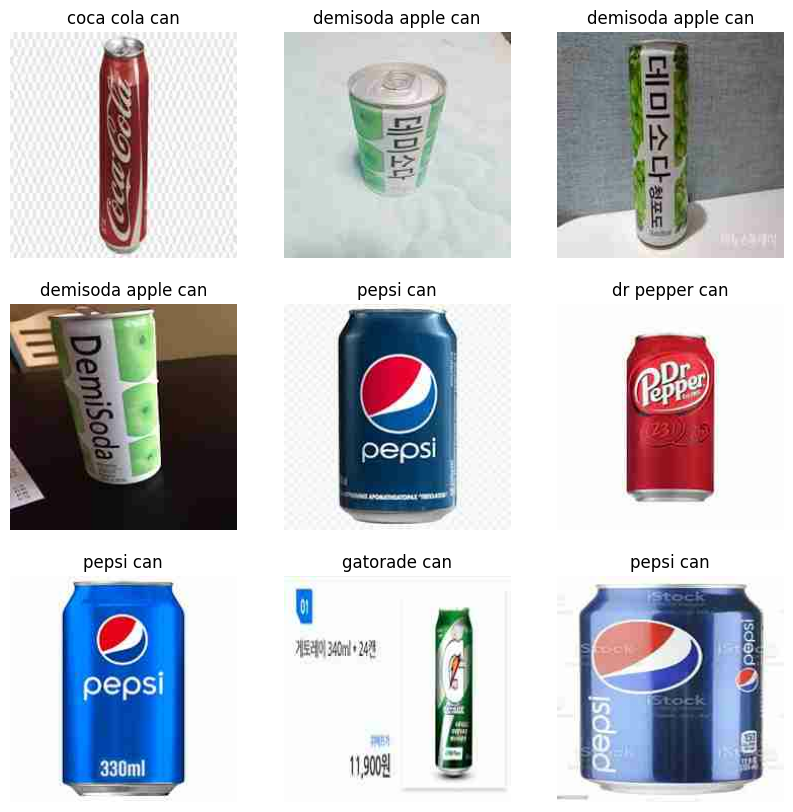

In [26]:
# class_names = os.listdir(train_dic)
class_names = ["chilsung cider can", "coca cola can", "demisoda apple can", "dr pepper can", "gatorade can", "pepsi can", "pocari sweat can", "powerade can"]
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [31]:
model = tf.keras.Sequential(
    [
     tf.keras.layers.Rescaling(1./255),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Dropout(0.25),

     tf.keras.layers.Conv2D(64, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Dropout(0.25),

     tf.keras.layers.Conv2D(128, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(256, activation="relu"),
     tf.keras.layers.Dropout(0.5)
     #tf.keras.layers.Dense(3)
    ]
)


In [32]:
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics=['accuracy']
)

In [33]:
model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 10
)

Epoch 1/10
22/22 [==============================] - 2s 66ms/step - loss: 6.0314 - accuracy: 0.0965 - val_loss: 5.5452 - val_accuracy: 0.0960
Epoch 2/10
22/22 [==============================] - 1s 62ms/step - loss: 5.5452 - accuracy: 0.0980 - val_loss: 5.5452 - val_accuracy: 0.0960
Epoch 3/10
22/22 [==============================] - 1s 61ms/step - loss: 5.5452 - accuracy: 0.0980 - val_loss: 5.5452 - val_accuracy: 0.0960
Epoch 4/10
22/22 [==============================] - 1s 62ms/step - loss: 5.5452 - accuracy: 0.0980 - val_loss: 5.5452 - val_accuracy: 0.0960
Epoch 5/10
22/22 [==============================] - 1s 62ms/step - loss: 5.5452 - accuracy: 0.0980 - val_loss: 5.5452 - val_accuracy: 0.0960
Epoch 6/10
22/22 [==============================] - 1s 62ms/step - loss: 5.5452 - accuracy: 0.0980 - val_loss: 5.5452 - val_accuracy: 0.0960
Epoch 7/10
22/22 [==============================] - 1s 62ms/step - loss: 5.5452 - accuracy: 0.0980 - val_loss: 5.5452 - val_accuracy: 0.0960
Epoch 8/10
22

: 

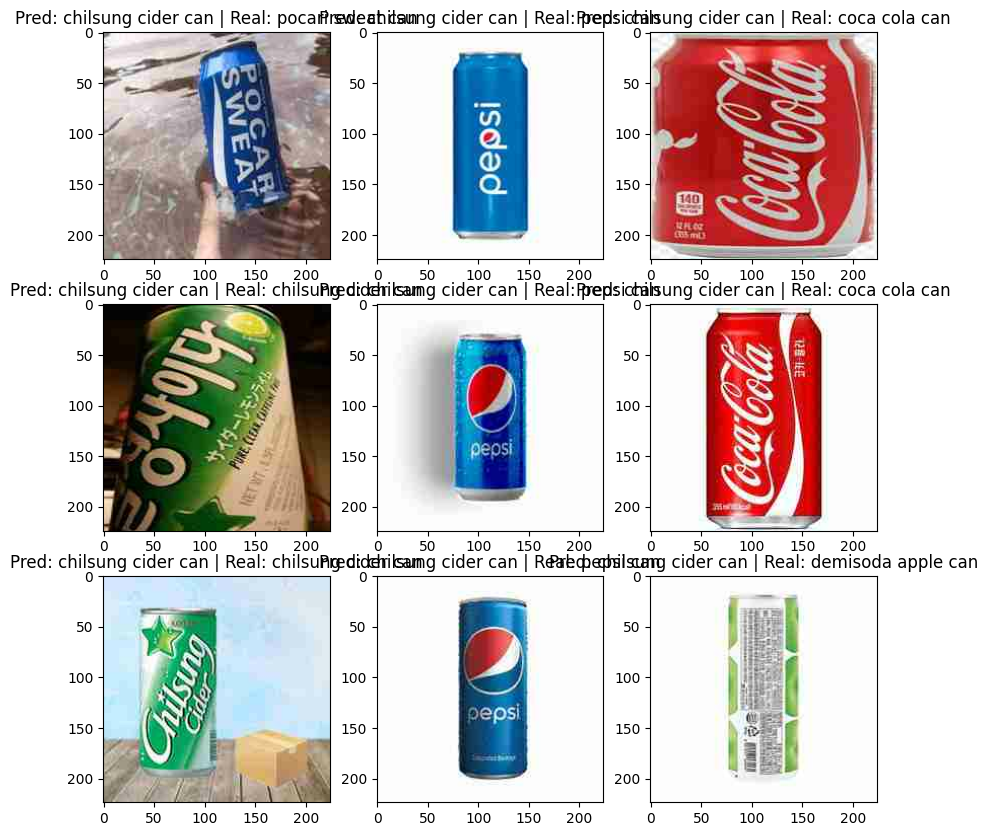

In [ ]:
import numpy

plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  classifications = model(images)
  # print(classifications)
  
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite", 'wb') as f:
  f.write(tflite_model)

2022-10-27 06:33:29.943209: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: /tmp/tmp8qbbmbkf/assets


2022-10-27 06:33:30.921768: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:357] Ignored output_format.
2022-10-27 06:33:30.922738: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:360] Ignored drop_control_dependency.


: 